<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Estudo_BS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Implementation of Black-Scholes formula in Python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definições

In [2]:
def BlackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [3]:
def delta(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "c":
            delta = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta = -norm.cdf(-d1, 0, 1)
        return delta
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [4]:
def gamma(r, S, K, T, sigma, type="c"):
    "Calculate gamma of a option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        gamma = norm.pdf(d1, 0, 1)/(S*sigma*np.sqrt(T))
        return gamma
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [5]:
def vega(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        vega = S*norm.pdf(d1, 0, 1)*np.sqrt(T)
        return vega*0.01
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [6]:
def theta(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            theta = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            theta = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return theta/365
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [7]:
def rho(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            rho = K*T*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            rho = -K*T*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return rho*0.01
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [8]:
r = 0.125       # Interest tax
#S = 97          # Stock
K = 100         # Stirke
#T = 1/252      # Time to end
sigma = 0.60    # Volatility
type="c"
S = np.linspace(75,125,100)
T = 0.2/252

In [9]:
bs = BlackScholes(r, S, K, T, sigma, type)
d =  delta(r, S, K, T, sigma,"c")
v = vega(r, S, K, T, sigma, type="c")
t = theta(r, S, K, T, sigma, type="c")
r0 = rho(r, S, K, T, sigma, type="c")

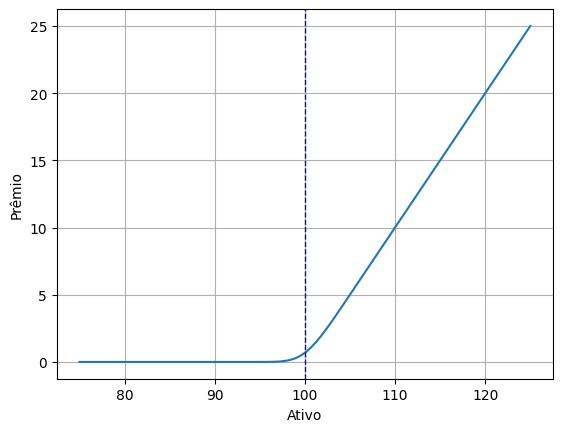

In [10]:
# Gerar o gráfico
plt.plot(S,bs)
plt.axvline(x=K,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.show()

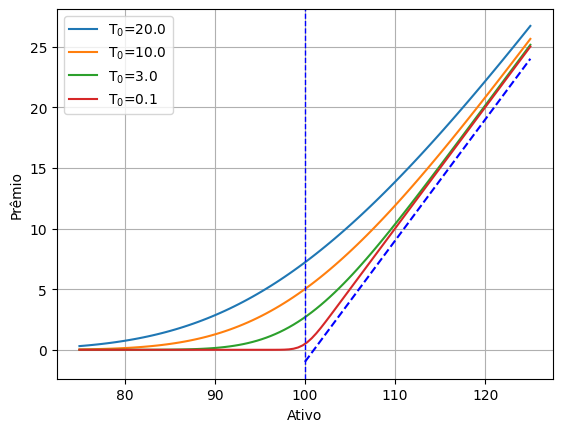

In [19]:
# Solução de BS para diferentes prazos
for Ti in [20/252,10/252,3.0/252,0.1/252]:
  y = BlackScholes(r, S, K, Ti, sigma, type)
  plt.plot(S,y,label=r'T$_0$='+str(Ti*252))

plt.axvline(x=K,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.plot([100,125],[-1,24], color='b', linestyle='dashed')
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.show()

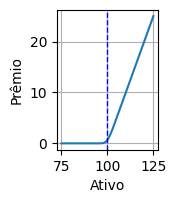

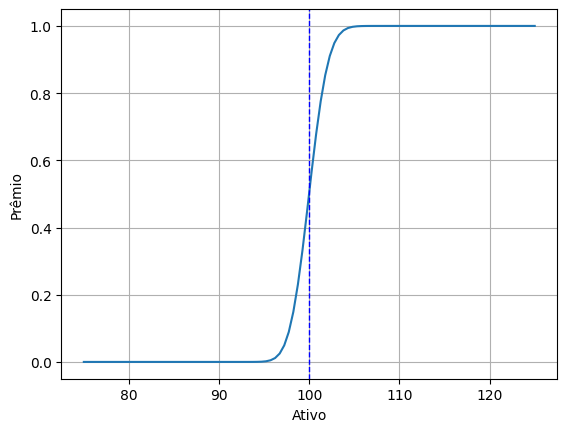

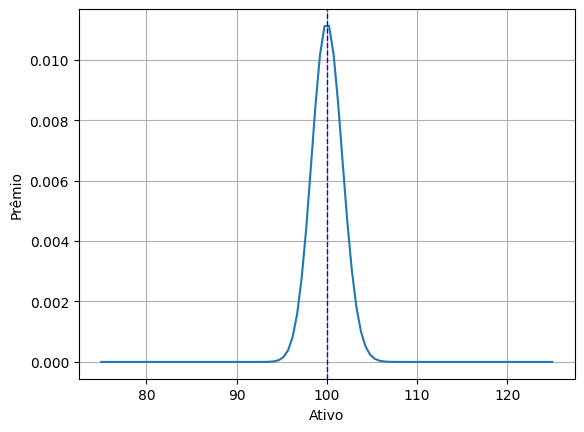

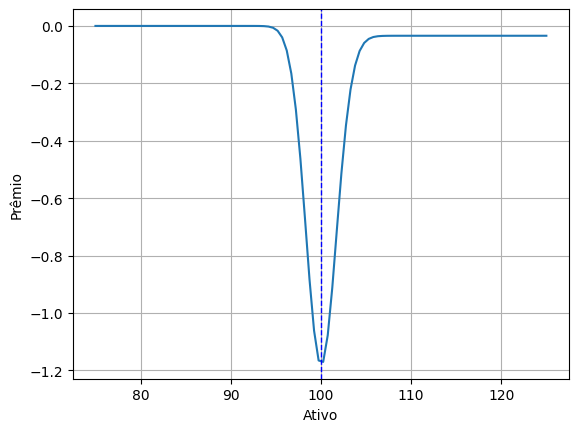

In [12]:
figura = plt.figure(figsize=(6,4))
figura.add_subplot(2,4,1)
plt.plot(S,bs)
plt.axvline(x=K,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.show()
figura.add_subplot(2,4,2)
plt.plot(S,d)
plt.axvline(x=K,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.show()
figura.add_subplot(2,4,3)
plt.plot(S,v)
plt.axvline(x=K,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.show()
figura.add_subplot(2,4,4)
plt.plot(S,t)
plt.axvline(x=K,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.show()